In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/combined_options_clean.csv")
print("✅ Loaded shape:", df.shape)
df.head()

✅ Loaded shape: (228, 22)


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,contractSize,currency,expiration,retrieved,ticker,moneyness,days_to_exp,future_price,return_1d,target
0,AAPL250620C00005000,2025-06-13 18:58:54+00:00,5.0,191.26,190.80,191.85,-2.750000,-1.417453,10.0,826,...,REGULAR,USD,2025-06-20,2025-06-15 14:32:54.038345,AAPL,0.026142,4,192.64,0.007215,0
1,AAPL250620C00010000,2025-06-09 17:59:26+00:00,10.0,192.64,185.40,187.55,0.000000,0.000000,40.0,51,...,REGULAR,USD,2025-06-20,2025-06-15 14:32:54.038345,AAPL,0.051910,4,182.12,-0.054610,0
2,AAPL250620C00015000,2025-06-13 13:47:55+00:00,15.0,182.12,180.35,182.65,-8.480011,-4.449114,2.0,5,...,REGULAR,USD,2025-06-20,2025-06-15 14:32:54.038345,AAPL,0.082363,4,183.00,0.004832,0
3,AAPL250620C00020000,2025-06-03 13:50:53+00:00,20.0,183.00,175.40,177.10,0.000000,0.000000,1.0,6,...,REGULAR,USD,2025-06-20,2025-06-15 14:32:54.038345,AAPL,0.109290,4,171.33,-0.063770,0
4,AAPL250620C00025000,2025-06-13 18:58:54+00:00,25.0,171.33,170.35,172.15,-5.550003,-3.137722,4.0,4,...,REGULAR,USD,2025-06-20,2025-06-15 14:32:54.038345,AAPL,0.145917,4,170.25,-0.006304,0


In [3]:
X = df[["strike", "lastPrice", "moneyness", "days_to_exp", "impliedVolatility", "volume"]]
y = df["target"]

In [4]:
print("Class balance:")
print(df["target"].value_counts())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

Class balance:
target
0    210
1     18
Name: count, dtype: int64


In [5]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.7608695652173914

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85        40
           1       0.33      0.83      0.48         6

    accuracy                           0.76        46
   macro avg       0.65      0.79      0.66        46
weighted avg       0.88      0.76      0.80        46



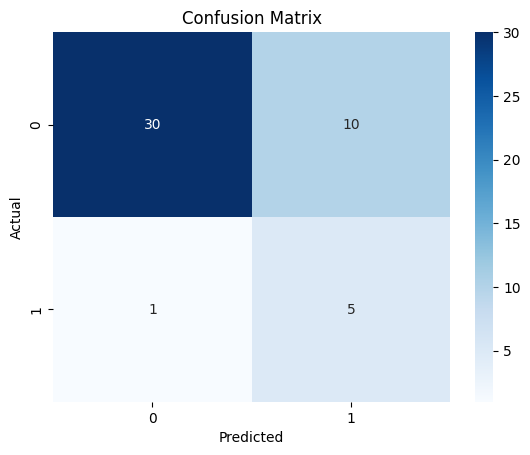

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [2]:
import joblib

joblib.dump(lgb_model, 'models/lightgbm_top_features_model.pkl')
print("✅ Model saved to models/lightgbm_top_features_model.pkl")

NameError: name 'lgb_model' is not defined